In [1]:
from datetime import datetime
from code.data import Data
from code.clustering import TrackClustering
from code.experiments import *
from code.models import *
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#Please download the dataset from http://mtg.upf.edu/static/datasets/last.fm/lastfm-dataset-1K.tar.gz 
#and extract it in to this directory
data = Data("dataset/lastfm-dataset-1K/userid-timestamp-artid-artname-traid-traname.tsv")

Skipping line 2120260: expected 6 fields, saw 8

Skipping line 2446318: expected 6 fields, saw 8

Skipping line 11141081: expected 6 fields, saw 8

Skipping line 11152099: expected 6 fields, saw 12
Skipping line 11152402: expected 6 fields, saw 8

Skipping line 11882087: expected 6 fields, saw 8

Skipping line 12902539: expected 6 fields, saw 8
Skipping line 12935044: expected 6 fields, saw 8

Skipping line 17589539: expected 6 fields, saw 8



#### Experiment to check if testing finish date is important to the results 

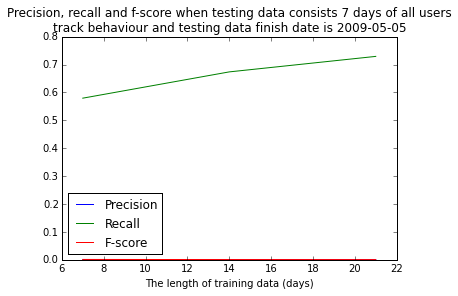

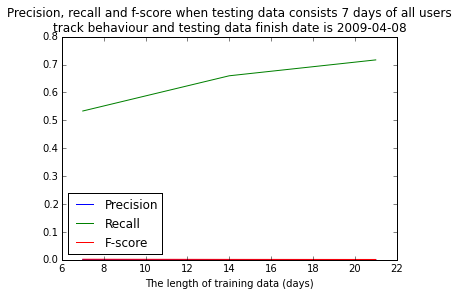

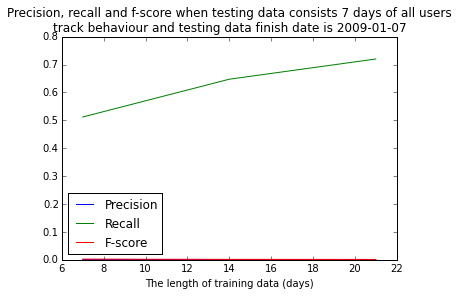

In [6]:
training_lengths = [21,14,7]
testing_lengths = [7]
testing_finish_dates = [datetime(2009, 5, 5), datetime(2009, 4, 8), datetime(2009, 1, 7)]

experiment = DataExperiment(training_lengths, testing_lengths, testing_finish_dates, AllPreviousTracks)
experiment.run(data, exp_id=0)

#### The scores are similar for all testing finish dates, therefore there are no anomalies with the data and we can fix testing finish date to 2009-05-05 as it will not have an impact on the findings below. Next, we continue experimenting with AllPreviousTracks to find the upper bound for the recall for specific parameter values

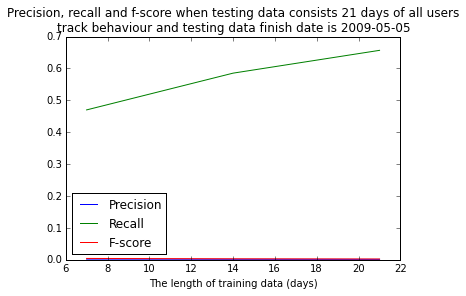

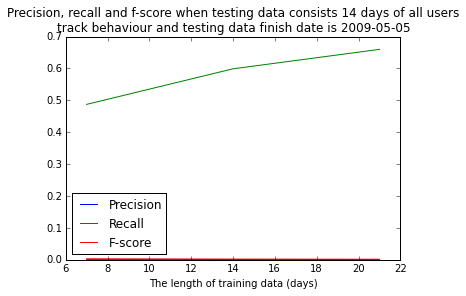

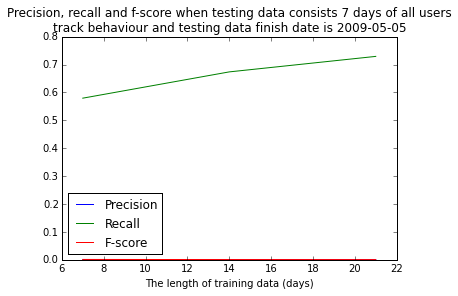

In [7]:
training_lengths = [21,14,7]
testing_lengths = [21,14,7]
testing_finish_dates = [datetime(2009, 5, 5)]

experiment = DataExperiment(training_lengths, testing_lengths, testing_finish_dates, AllPreviousTracks)
experiment.run(data, exp_id=0, as_graph=True)

In [62]:
for i,j in [(7,7),(14,14),(14,7)]:
    _ = data.create_experiment_data(i, j, datetime(2009, 5, 5), 0)
    model = AllPreviousTracks(data, 0)
    model.run()

==== AllPreviousTracks ====
Model precision: 0.000624075225112
Model recall: 0.579352212458
F1 score: 0.00124310423208
==== AllPreviousTracks ====
Model precision: 0.00108659156693
Model recall: 0.599001645986
F1 score: 0.00216211772173
==== AllPreviousTracks ====
Model precision: 0.000453019073402
Model recall: 0.673514765353
F1 score: 0.000903701651958


#### As expected, it does not matter how many days of testing data we use for evaluation, more training data will always result with better recall. We report the scores for 3 training and testing length parameter combinations: (7, 7), (14, 14), (14, 7) - where the first number represents training length and second - testing length (in days). Next, we experiment with UserPreviousTracks to find the relation between training length and testing length

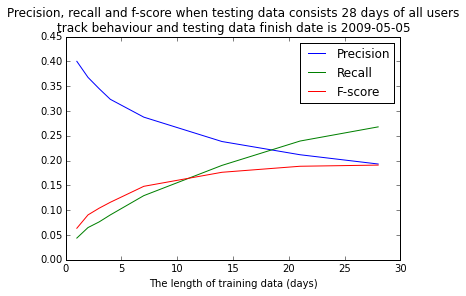

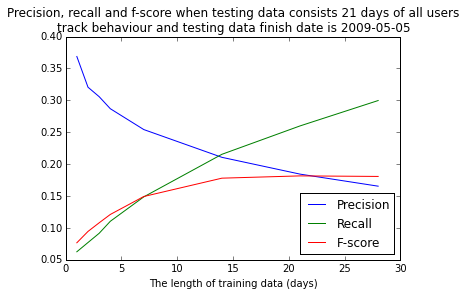

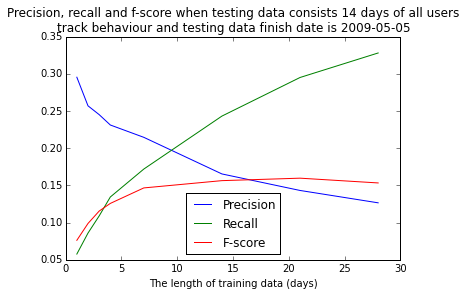

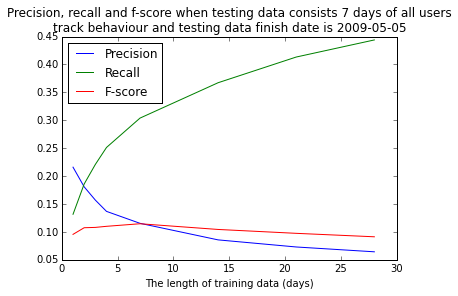

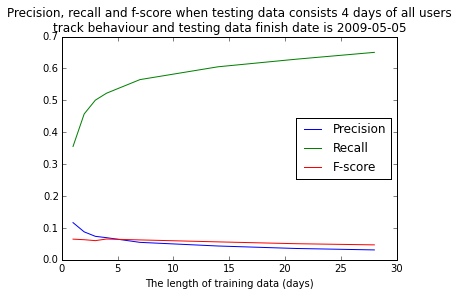

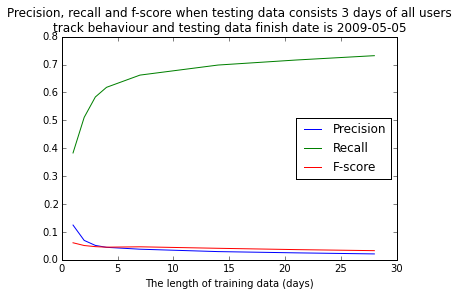

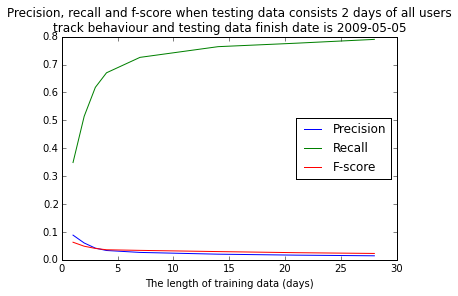

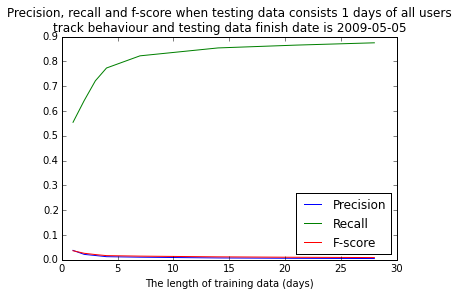

In [21]:
training_lengths = [28,21,14,7,4,3,2,1]
testing_lengths = [28,21,14,7,4,3,2,1]
testing_finish_dates = [datetime(2009, 5, 5)]

experiment = DataExperiment(training_lengths, testing_lengths, testing_finish_dates, UserPreviousTracks)
experiment.run(data, exp_id=0)

In [66]:
for i,j in [(7,7),(14,14),(14,7)]:
    _ = data.create_experiment_data(i, j, datetime(2009, 5, 5), 0)
    model = UserPreviousTracks(data, 0)
    _ = model.run()

==== UserPreviousTracks ====
Model precision: 0.115391539179
Model recall: 0.303923845349
F1 score: 0.114608420871
==== UserPreviousTracks ====
Model precision: 0.16540317617
Model recall: 0.243160206328
F1 score: 0.156396488007
==== UserPreviousTracks ====
Model precision: 0.0856962702844
Model recall: 0.367339671068
F1 score: 0.104383450646


#### Results suggest that best f-score is achieved when training length is equal to testing length. We report the scores for the same 3 training and testing length parameter combinations: (7, 7), (14, 14), (14, 7). Our next experiment is to find the best N for NMostOften model

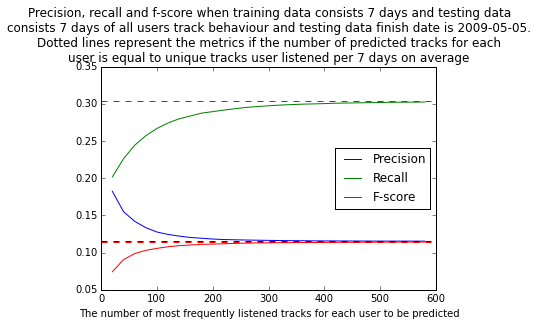

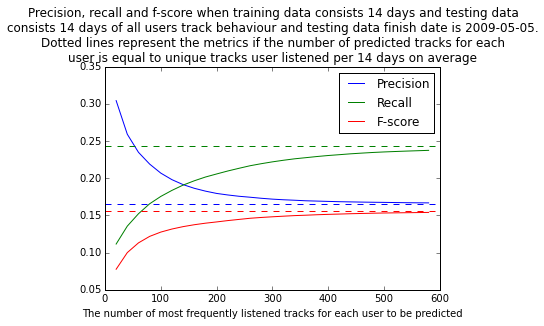

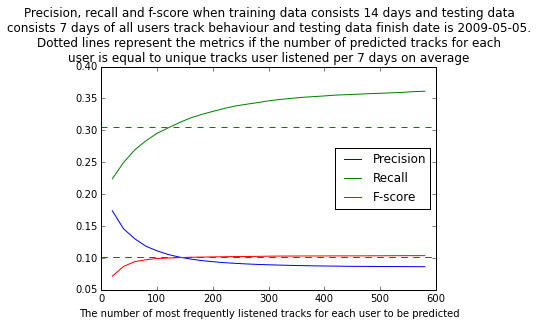

In [68]:
for i,j in [(7,7),(14,14),(14,7)]:
    n = [x for x in xrange(0, 600, 20)]
    training_length = i
    testing_length = j
    finish_testing = datetime(2009, 5, 5)
    experiment = NMostOftenExperiment(training_length, testing_length, finish_testing, data, exp_id=0, n_values=n)
    experiment.run()

In [69]:
for i,j in [(7,7),(14,14),(14,7)]:
    id_1 = data.create_experiment_data(i, j, datetime(2009, 5, 5), 1, True)
    model = NMostOften(data, id_1, n_most_often=0)
    _ = model.run()

==== NMostOften ====
Model precision: 0.115391539179
Model recall: 0.303923845349
F1 score: 0.114608420871
==== NMostOften ====
Model precision: 0.16540317617
Model recall: 0.243160206328
F1 score: 0.156396488007
==== NMostOften ====
Model precision: 0.101351071923
Model recall: 0.305581152481
F1 score: 0.101958648557


#### The best f-score is achieved with N being equal to unique tracks user listened per testing length period on average. We report the scores for the same 3 training and testing length parameter combinations: (7, 7), (14, 14), (14, 7). We now start using clustered track network and the models associated with it. We begin with Clustering Experiments to find the best minimum similarity (between two track to be considered as similar) values for each model that uses clusters for 3 training and testing length parameter combinations: (7, 7), (14, 14), (14, 7).  

The modularity of the network is 0.997703
The modularity of the network is 0.999374
The modularity of the network is 0.999366
The modularity of the network is 0.999759
The modularity of the network is 0.999752
The modularity of the network is 0.994152


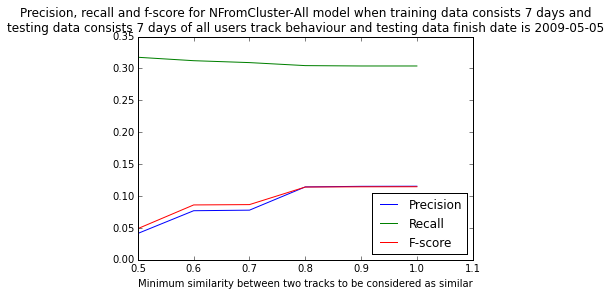

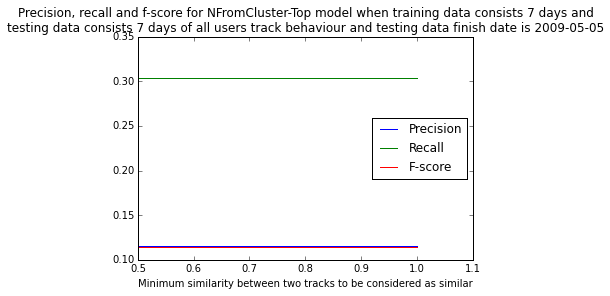

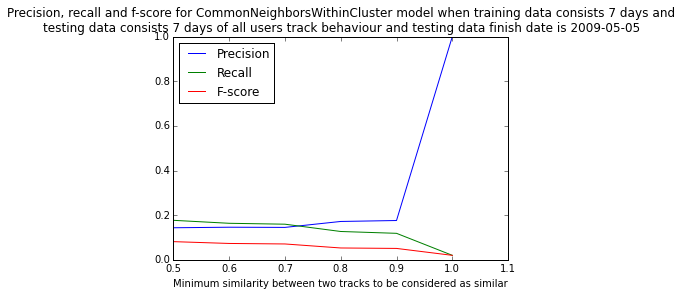

The modularity of the network is 0.999076
The modularity of the network is 0.999696
The modularity of the network is 0.999692
The modularity of the network is 0.999841
The modularity of the network is 0.999838
The modularity of the network is 0.995192


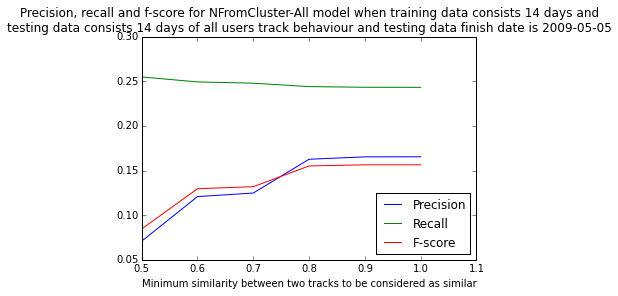

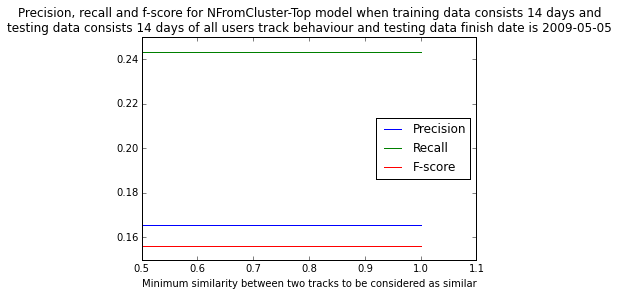

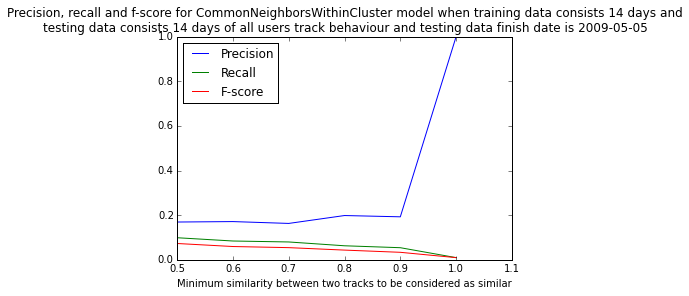

The modularity of the network is 0.999143
The modularity of the network is 0.999700
The modularity of the network is 0.999694
The modularity of the network is 0.999844
The modularity of the network is 0.999839
The modularity of the network is 0.995783


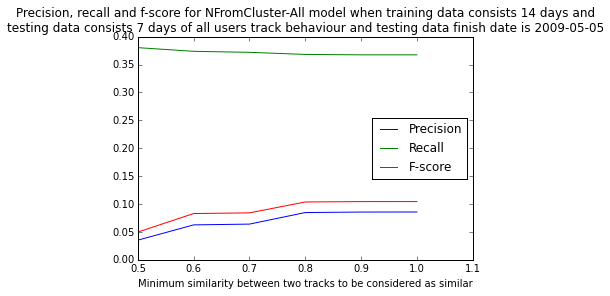

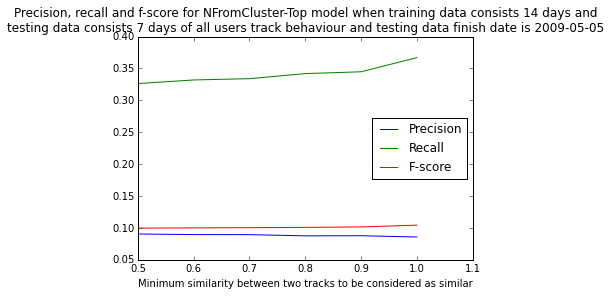

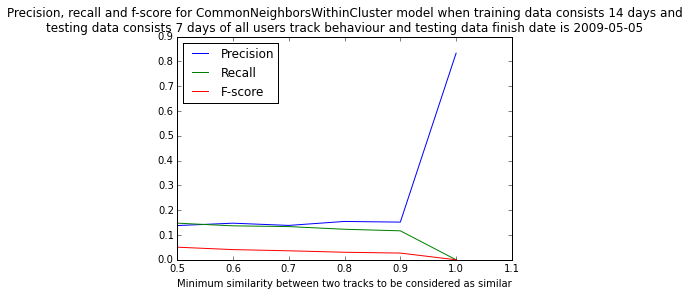

In [70]:
for i,j in [(7,7),(14,14),(14,7)]:
    n = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    training_length = i
    testing_length = j
    finish_testing = datetime(2009, 5, 5)
    experiment = ClusteringExperiment(training_length, testing_length, finish_testing, data, exp_id=0, n_values=n)
    experiment.run()

In [4]:
for i,j in [(7,7),(14,14),(14,7)]:
    id_1 = data.create_experiment_data(i, j, datetime(2009, 5, 5), 1, True)
    training_data = data.get_training_data(id_1)
    clustering = TrackClustering(training_data, maximum_diff=60, minimum_similarity=0.3)
    clustering.run()
    model = CommonNeighborsWithinCluster(data, id_1, cluster=clustering)
    _ = model.run()

The modularity of the network is 0.903812
==== CommonNeighborsWithinCluster ====
Model precision: 0.131437569379
Model recall: 0.209055504557
F1 score: 0.101579549668
The modularity of the network is 0.913869
==== CommonNeighborsWithinCluster ====
Model precision: 0.176572154288
Model recall: 0.141376040068
F1 score: 0.110791272543
The modularity of the network is 0.914019
==== CommonNeighborsWithinCluster ====
Model precision: 0.143315630394
Model recall: 0.180464442016
F1 score: 0.0750019828507


In [72]:
for i,j in [(7,7),(14,14),(14,7)]:
    id_1 = data.create_experiment_data(i, j, datetime(2009, 5, 5), 1, True)
    training_data = data.get_training_data(id_1)
    clustering = TrackClustering(training_data, maximum_diff=60, minimum_similarity=1)
    clustering.run()
    model = NFromCluster(data, id_1, cluster=clustering, from_clusters='all')
    _ = model.run()
    model = NFromCluster(data, id_1, cluster=clustering, from_clusters='top')
    _ = model.run()
    clustering = TrackClustering(training_data, maximum_diff=60, minimum_similarity=0.5)
    clustering.run()
    model = CommonNeighborsWithinCluster(data, id_1, cluster=clustering)
    _ = model.run()

The modularity of the network is 0.994152
==== NFromCluster ====
Model precision: 0.115352856242
Model recall: 0.303923845349
F1 score: 0.114583136428
==== NFromCluster ====
Model precision: 0.115391539179
Model recall: 0.303923845349
F1 score: 0.114608420871
The modularity of the network is 0.997703
==== CommonNeighborsWithinCluster ====
Model precision: 0.143550832141
Model recall: 0.176919616125
F1 score: 0.0813952107949
The modularity of the network is 0.995192
==== NFromCluster ====
Model precision: 0.165371154109
Model recall: 0.243166824024
F1 score: 0.156384750271
==== NFromCluster ====
Model precision: 0.16540317617
Model recall: 0.243160206328
F1 score: 0.156396488007
The modularity of the network is 0.999076
==== CommonNeighborsWithinCluster ====
Model precision: 0.169213921955
Model recall: 0.0988703833505
F1 score: 0.0730638595819
The modularity of the network is 0.995783
==== NFromCluster ====
Model precision: 0.0856683631486
Model recall: 0.367339671068
F1 score: 0.10436

#### We find that f-score is maximised with minimum similarity being equal to 1 for NFromCluster models and equal to 0.5 for CommonNeighborsWithinCluster model. We report the scores for all three models with the corresponding minimum similarity values.

#### If we were actually using common neighbor technique where also pairs of listened tracks from different clusters are considered then the precision would be even higher, however not significantly and for bigger training and testing sets this technique would be infeasible  

In [ ]:
id_1 = data.create_experiment_data(7, 7, datetime(2009, 5, 5), 1, True)
model = CommonNeighbors(data, id_1, cluster=clustering)
_ = model.run()

==== by_common_neighbors ====
Model precision: 0.160753563597
Model recall: 0.178441045417
F1 score: 0.0848058892443


(0.16075356359706575, 0.17844104541658393, 0.08480588924427827)